# Business Understanding

## Project Domain

**Agricultural Data Science / Computer Vision in Agriculture**

Proyek ini berada di ranah ilmu data terapan dalam pertanian, khususnya klasifikasi jenis kacang kering berdasarkan karakteristik morfologi. Dengan bantuan machine learning, dataset ini digunakan untuk membangun model klasifikasi yang dapat mengenali jenis kacang berdasarkan fitur numerik yang diekstraksi dari citra kacang.

## Problem Statements

Petani dan distributor pertanian sering kali menghadapi tantangan dalam mengidentifikasi jenis kacang kering secara cepat dan akurat, terutama dalam proses skala besar. Proses identifikasi manual memerlukan tenaga ahli dan memakan waktu. Oleh karena itu, diperlukan sistem otomatis berbasis machine learning yang dapat membantu klasifikasi jenis kacang kering hanya berdasarkan data morfologi.

## Goals

Membangun model machine learning untuk mengklasifikasikan jenis kacang kering ke dalam salah satu dari tujuh kelas: SEKER, BARBUNYA, BOMBAY, CALI, HOROZ, SIRA, dan DERMASON.

Mengevaluasi performa berbagai algoritma klasifikasi seperti Decision Tree, Random Forest, SVM, atau KNN pada dataset kacang kering.

Memberikan solusi yang dapat membantu otomasi di industri pertanian atau pabrik pengolahan makanan berbasis biji-bijian.

## Solustion Statements

Menggunakan fitur numerik seperti Area, Perimeter, Eccentricity, dan lainnya yang diperoleh dari pencitraan digital kacang.

Melakukan eksplorasi data dan preprocessing untuk memastikan data siap digunakan dalam pelatihan model.

Membangun dan melatih beberapa model machine learning untuk membandingkan performa klasifikasi.

Mengimplementasikan pipeline klasifikasi yang dapat digunakan untuk prediksi jenis kacang dari data baru.

# Data Understanding

## Import Data dari Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annisaaz","key":"804a8e86d6c57ffd5c9d6fcc50026827"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d muratkokludataset/dry-bean-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset
License(s): CC0-1.0


In [ ]:
!mkdir dry-bean-dataset
!unzip dry-bean-dataset.zip -d dry-bean-dataset
!ls dry-bean-dataset

Archive:  dry-bean-dataset.zip
  inflating: dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.arff  
  inflating: dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx  
  inflating: dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset_Citation_Request.txt  
Dry_Bean_Dataset


## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv("/content/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.csv")

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

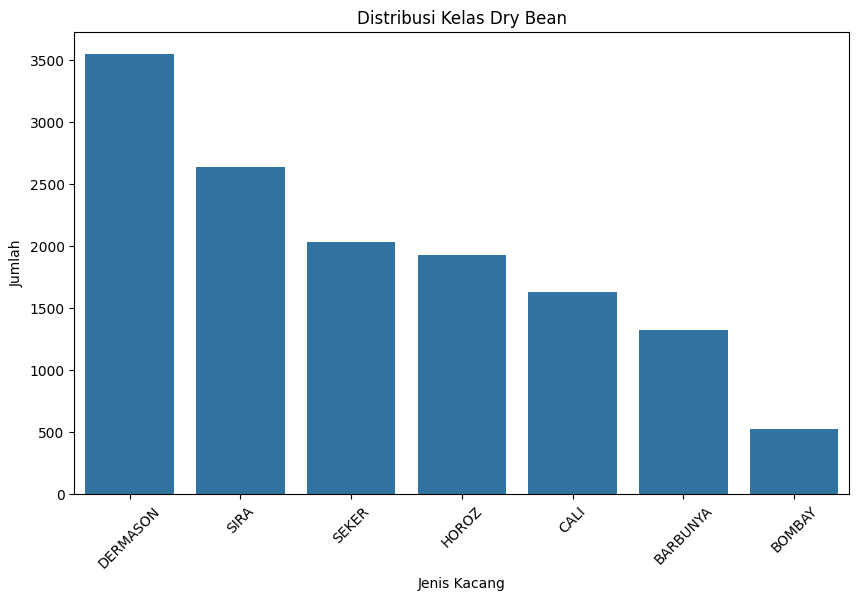

In [ ]:
1. # Distribusi Kelas Dry Bean
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df, order=df['Class'].value_counts().index)
plt.title('Distribusi Kelas Dry Bean')
plt.xticks(rotation=45)
plt.ylabel('Jumlah')
plt.xlabel('Jenis Kacang')
plt.show()

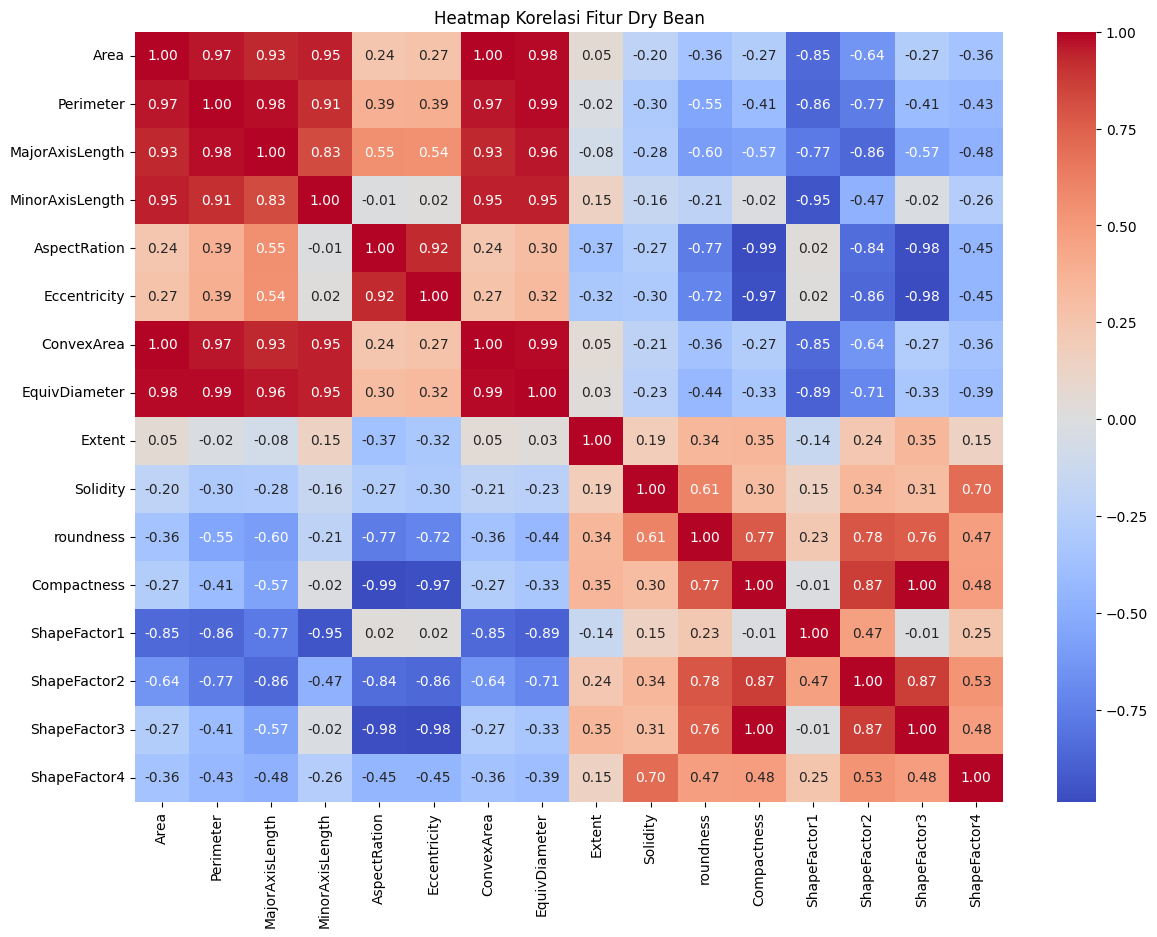

In [ ]:
2. # Heatmap Korelasi Fitur Dry Bean
plt.figure(figsize=(14, 10))
corr_matrix = df.drop('Class', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Dry Bean')
plt.show()

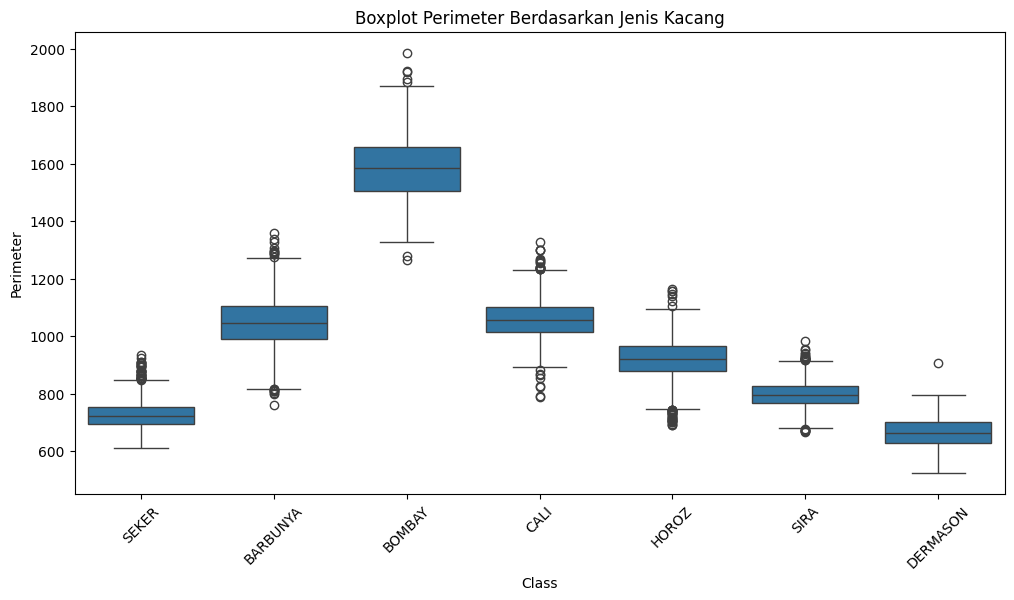

In [ ]:
3. # Area Berdasarkan Jenis Kacang
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Perimeter', data=df)
plt.title('Boxplot Perimeter Berdasarkan Jenis Kacang')
plt.xticks(rotation=45)
plt.show()

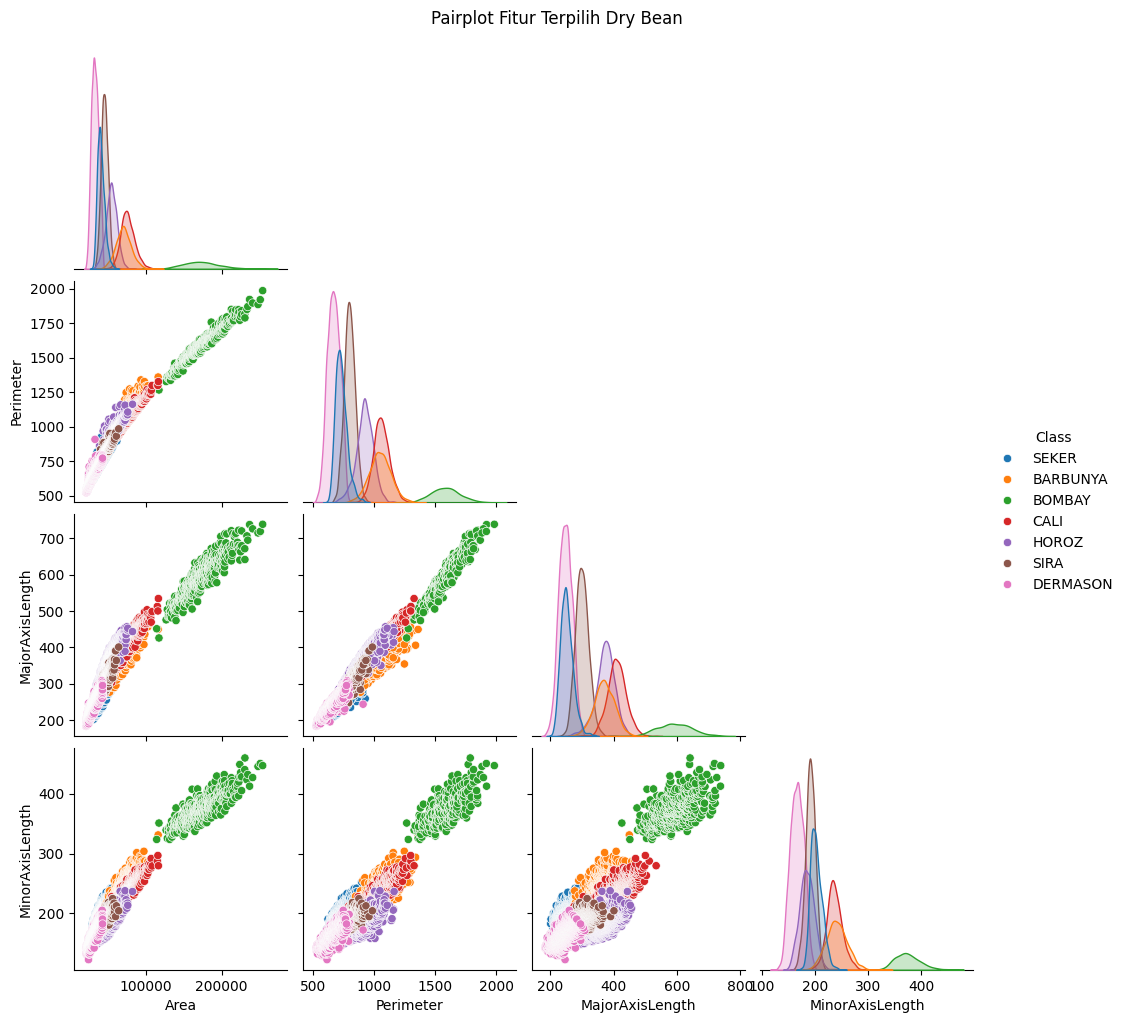

In [ ]:
4. # Pairplot Fitur Terpilih Dry Bean
subset_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Class']
sns.pairplot(df[subset_features], hue='Class', corner=True)
plt.suptitle("Pairplot Fitur Terpilih Dry Bean", y=1.02)
plt.show()

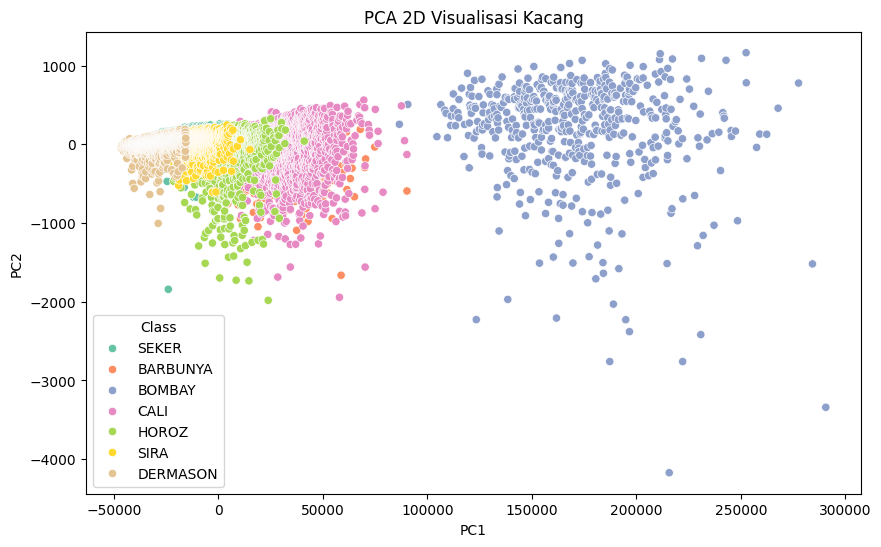

In [ ]:
5. # PCA 2D Visulisasi Kacang
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(df.drop('Class', axis=1))

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = df['Class']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', palette='Set2')
plt.title('PCA 2D Visualisasi Kacang')
plt.show()

# Data Preparation

In [ ]:
# pisahkan fitur dan target
X = df.drop(columns=["Class"])
y = df["Class"]

In [ ]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,743 (49.78 KB)

 Trainable params: 12,743 (49.78 KB)

 Non-trainable params: 0 (0.00 B)

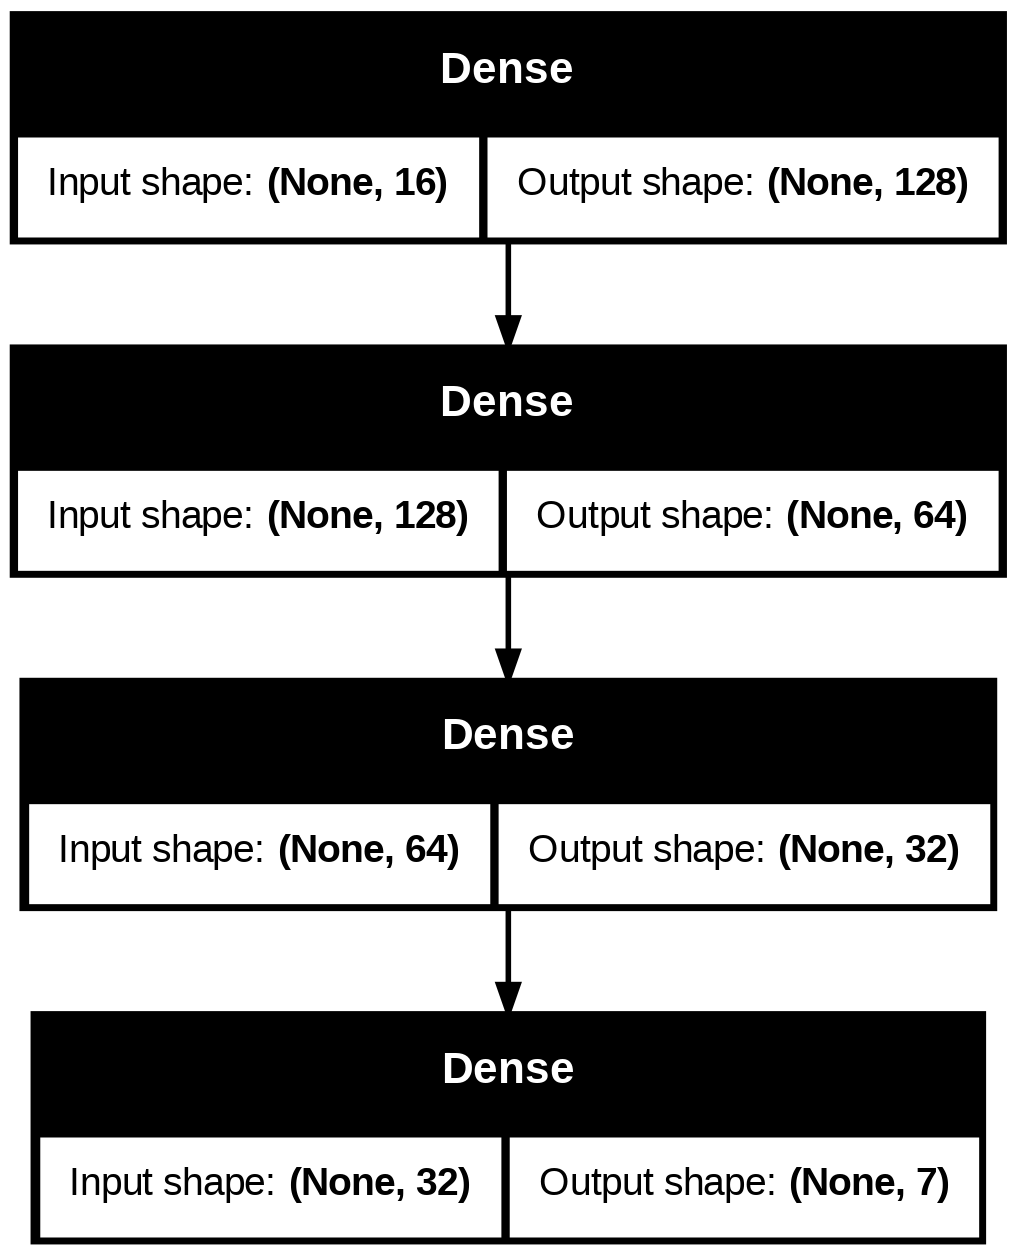

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6855 - loss: 0.8734 - val_accuracy: 0.8873 - val_loss: 0.2924
Epoch 2/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8877 - loss: 0.3009 - val_accuracy: 0.8880 - val_loss: 0.2977
Epoch 3/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8920 - loss: 0.2855 - val_accuracy: 0.9049 - val_loss: 0.2607
Epoch 4/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9030 - loss: 0.2616 - val_accuracy: 0.9148 - val_loss: 0.2355
Epoch 5/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9044 - loss: 0.2579 - val_accuracy: 0.9133 - val_loss: 0.2389
Epoch 6/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9087 - loss: 0.2458 - val_accuracy: 0.9170 - val_loss: 0.2215
Epoch 7/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9129 - loss: 0.2265 - val_accuracy: 0.9163 - val_loss: 0.2166
Epoch 8/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9099 - loss: 0.2430 - val_accuracy: 0.

# Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9344 - loss: 0.1784
Akurasi Model: 0.9291
Loss Model: 0.1917


In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

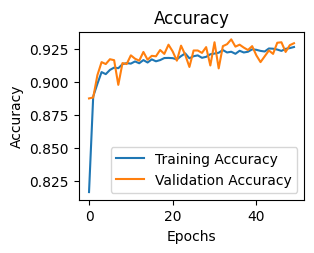

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

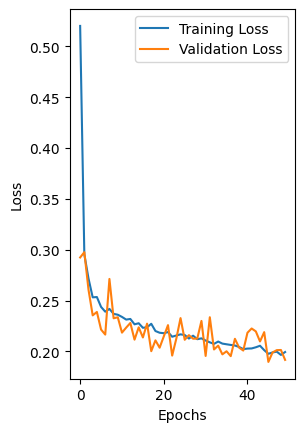

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


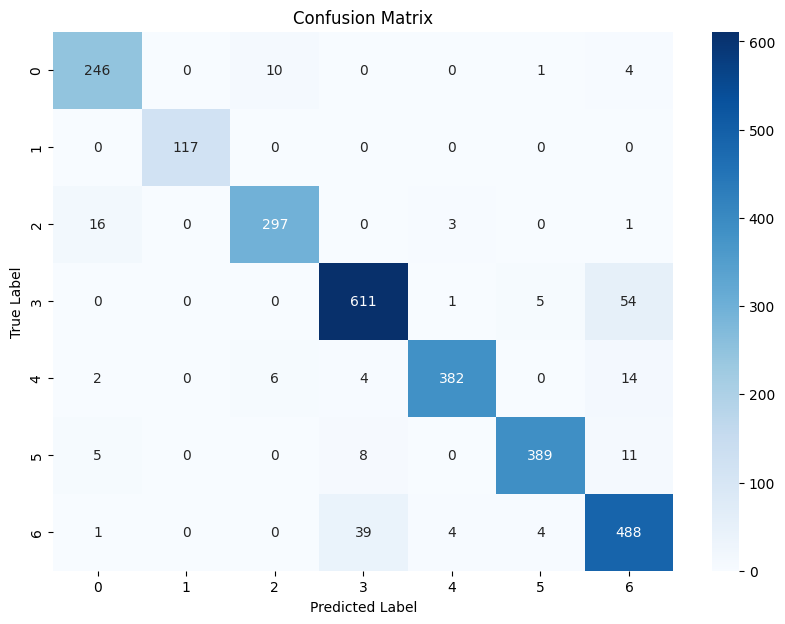

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       261
           1       1.00      1.00      1.00       117
           2       0.95      0.94      0.94       317
           3       0.92      0.91      0.92       671
           4       0.98      0.94      0.96       408
           5       0.97      0.94      0.96       413
           6       0.85      0.91      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [ ]:
# Sample input:
sample_input = np.array([[2000, 200, 150, 100, 1.5,
                          0.8, 2100, 50.2, 0.75, 0.98,
                          0.7, 0.85, 0.03, 0.0001, 0.9, 0.85]])
sample_input_df = pd.DataFrame(sample_input)

In [ ]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Prediksi
prediction = model.predict(sample_input_scaled)
predicted_class = np.argmax(prediction)
predicted_label = le.inverse_transform([predicted_class])

print(f"Jenis kacang yang diprediksi: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Jenis kacang yang diprediksi: HOROZ


## Save Model

In [ ]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('drybean_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpgnih7_ps'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  135536872311888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135536872313040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135536872311312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135536872309584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135536872313616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135536872309776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135536872314000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135536872312848: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'drybean_model.pkl')

['drybean_model.pkl']

In [ ]:
model.save("drybean_model.h5")